In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.set_printoptions(precision = 5, suppress=True)

raw_data = []
with open('가스공급량_20230217170926.csv') as f:
    for line in f:
        raw_data.append(line[:-1].split(','))
        
t = set()
for e in raw_data:
    t.add(len(e))
print(t)

np_data = np.array(raw_data[2:])
np_data = np_data[:, 2:].astype(np.int64)
print(np_data[3:])

{8}
[[     1 114671    311   8105     64  22909]
 [     1  79649    311   7787     64  23615]
 [     1  70646    311   7137     64  22361]
 [     1  68554    311   5928     64  24491]
 [     1  65293    311   6023     64  25393]
 [     1  62398    311   6742     64  23564]
 [     1  77985    311   6366     64  23173]
 [     1 113800    311   8560     64  23772]
 [     1 160555    311   9397     64  26409]
 [     1 200683    291  12137     67  25458]
 [     1 144076    291  10072     67  22023]
 [     1 145930    291  13017     67  25698]
 [     1 103965    291  11192     67  22857]
 [     1  83355    291  10446     67  23492]
 [     1  74141    291   6815     67  21185]
 [     1  70168    291   8118     67  24649]
 [     1  64615    291   9076     67  25570]
 [     1  66426    291   7839     67  23129]
 [     1  81153    291   5006     67  22233]
 [     1  99188    291   5304     67  20067]
 [     1 164254    291   8328     67  25656]
 [     1 178441    280  12039     71  25942]
 [    

[[     12 1308867    3532  111675     798  286475]
 [     12 1319651    3380   98759     844  270322]
 [     12 1336780    3359   73029     832  259423]]


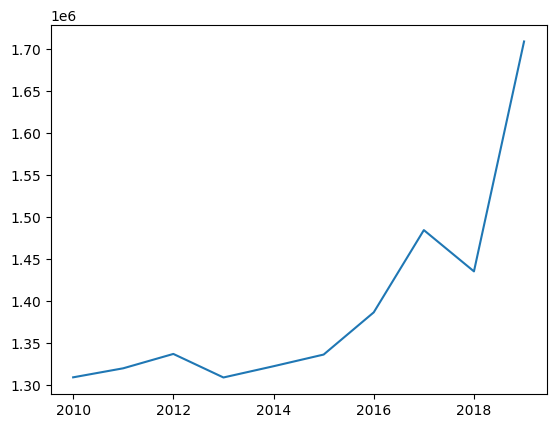

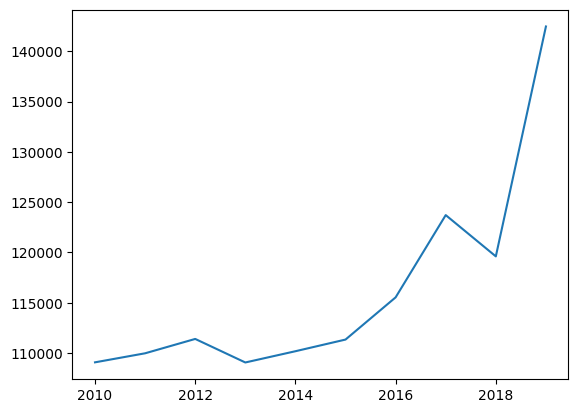

In [23]:
by_year = np.add.reduceat(np_data, np.arange(10, 130, 12))
print(by_year[:3])

total_gas = by_year[:, 1] + by_year[:, 3]
ln_gas = by_year[:, 1]/total_gas
lp_gas = by_year[:, 3]/total_gas

#_, axe = plt.subplots()
#axe.plot(np.arange(2010, 2020), ln_gas)     # 연도별 도시가스+프로판 사용량 대비, 도시가스  사용량 비율

#_, axe = plt.subplots()
#axe.plot(np.arange(2010, 2020), lp_gas)

_, axe = plt.subplots()
axe.plot(np.arange(2010, 2020), by_year[:, 1])  # 연도별 도시가스 총 사용량

_, axe = plt.subplots()
axe.plot(np.arange(2010, 2020), by_year[:, 1]/12)  # 연도별 도시가스 평균 사용량

[[1.      0.70736]
 [0.70736 1.     ]]


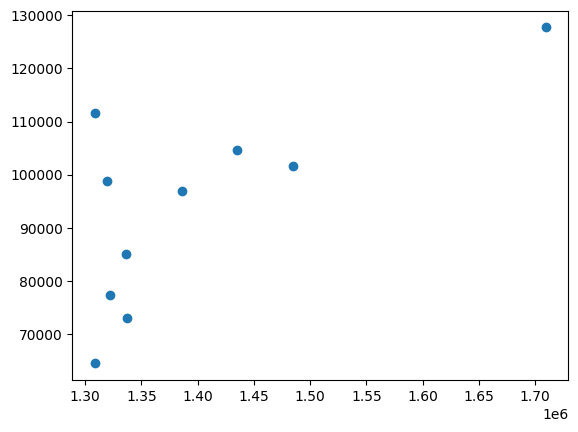

In [28]:
print(np.corrcoef(by_year[:, 1], by_year[:, 3]))
_, axe = plt.subplots()
axe.scatter(by_year[:, 1], by_year[:, 3])

In [47]:
# print(np_data[:10])
by_season = np.add.reduceat(np_data[3:], np.arange(0, 130, 6))
print(by_season[:3])

print('===================')
summers_sum = by_season[::2]
print(summers_sum[:2])
print('===================')
winters_sum = by_season[::]
print(winters_sum[3]) 

[[     6 461211   1866  41722    384 142333]
 [     6 843029   1806  59549    393 146533]
 [     6 462670   1746  53486    402 140882]]
[[     6 461211   1866  41722    384 142333]
 [     6 462670   1746  53486    402 140882]]
[     6 840697   1711  53252    414 140133]


In [51]:
# 2010년 여름 평균 사용량
print(summers_sum[0])
print(np_data[3: 9])
# 2010-2011 겨울 평균 사용량
print(winters_sum[0])
print(np_data[9: 15])

[     6 461211   1866  41722    384 142333]
[[     1 114671    311   8105     64  22909]
 [     1  79649    311   7787     64  23615]
 [     1  70646    311   7137     64  22361]
 [     1  68554    311   5928     64  24491]
 [     1  65293    311   6023     64  25393]
 [     1  62398    311   6742     64  23564]]
[     6 461211   1866  41722    384 142333]
[[     1  77985    311   6366     64  23173]
 [     1 113800    311   8560     64  23772]
 [     1 160555    311   9397     64  26409]
 [     1 200683    291  12137     67  25458]
 [     1 144076    291  10072     67  22023]
 [     1 145930    291  13017     67  25698]]
